# Лабораторная 1

In [2]:
from random import random, uniform
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import pandas as pd
import numpy as np
from scipy.stats import chi2
import math
%matplotlib inline

In [3]:
def y(x):
    sign = x / abs(x)
    y = abs(x) ** (1. / 3) * sign
    return y


def F(y):
    return 0.5 * (1 + y**3)


def f(y):
    return 1.5 * y**2


def get_sample(a, b, size):
    sample = list()
    for i in range(size):
        x = random() * (b - a) + a
        sample.append(y(x))
    sample.sort()
    return sample


def get_M(n):
    if n <= 100:
        return round(math.sqrt(n))
    else:
        return round(uniform(2, 4) * math.log10(n))

    
def pretty_table(fields: list, values: list):
    t = PrettyTable()

    t.field_names = fields
    for row in values:
        t.add_row(row)

    print(t)

Enter sample size: 10
Enter an interval (a and b): -1 1

Sample: 
[-0.9837735919200457, -0.9605412598568495, -0.9022734929937004, -0.8213849168770773, -0.7896741617293874, -0.6189462092365704, -0.35925903129047615, -0.3449026213241912, 0.29003946557405313, 0.9135061360896333]

Variation series: 
[-0.9837735919200457, -0.9605412598568495, -0.9022734929937004, -0.8213849168770773, -0.7896741617293874, -0.6189462092365704, -0.35925903129047615, -0.3449026213241912, 0.29003946557405313, 0.9135061360896333]
+----------------------+-------+
|          Y           | F*(y) |
+----------------------+-------+
| -0.9837735919200457  |  0.0  |
| -0.9605412598568495  |  0.1  |
| -0.9022734929937004  |  0.2  |
| -0.8213849168770773  |  0.3  |
| -0.7896741617293874  |  0.4  |
| -0.6189462092365704  |  0.5  |
| -0.35925903129047615 |  0.6  |
| -0.3449026213241912  |  0.7  |
| 0.29003946557405313  |  0.8  |
|  0.9135061360896333  |  0.9  |
+----------------------+-------+


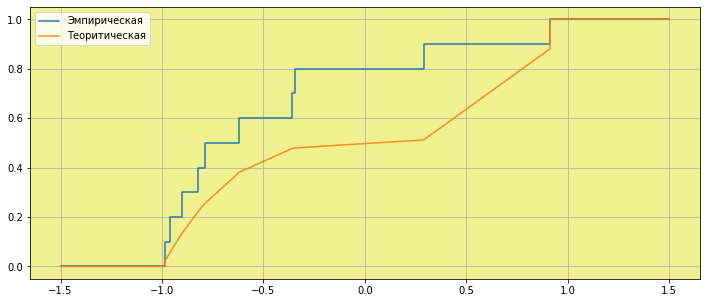

In [4]:
sample_size = int(input("Enter sample size: "))
a, b = input("Enter an interval (a and b): ").split()
a, b = int(a), int(b)

# ---------------------------------------------------
# Выборка
# ---------------------------------------------------
sample = get_sample(a, b, sample_size)
print("\nSample: \n{}".format(sample))

# ---------------------------------------------------
# Вариационный ряд
# ---------------------------------------------------
sample.sort()
print("\nVariation series: \n{}".format(sample))

# ---------------------------------------------------
# График F*(y)
# ---------------------------------------------------
fig, plot = plt.subplots()

plt_x, plt_y = list(), list()
plt_x.append(-1.5)
plt_y.append(0)
plt_y.append(0)
i = 0
for x in sample:
    plt_x.append(x)
    plt_x.append(x)
    i += 1
    height = i/sample_size
    plt_y.append(height)
    plt_y.append(height)
plt_x.append(1.5)

plot.plot(plt_x, plt_y, label="Эмпирическая")

# ---------------------------------------------------
# График F(y)
# ---------------------------------------------------
plt_x2, plt_y2 = list(), list()
plt_x2.append(-1.5)
plt_y2.append(0)
plt_x2.append(sample[0])
plt_y2.append(0)
for x in sample:
    plt_x2.append(x)
    plt_y2.append(0.5 * (1 + x**3))
plt_x2.append(sample[sample_size - 1])
plt_y2.append(1)
plt_x2.append(1.5)
plt_y2.append(1)

plot.plot(plt_x2, plt_y2, label="Теоритическая", alpha=0.9)

# ---------------------------------------------------
# Таблица для эмпирической функции распределения
# ---------------------------------------------------
header = ["Y", "F*(y)"]
pretty_table(header, zip(sample, np.arange(sample_size) / sample_size))

# ---------------------------------------------------
plot.legend()
plot.grid()
plot.set_facecolor('#f0f090')
fig.set_figheight(5)

fig.set_figwidth(12)
plt.show()

# -------------------------------------------------------------------------

# Лабораторная 2

# -------------------------------------------------------------------------



## 1. Равноинтервальный метод



### Функция распределeния СВ   $Y= X^{1/3}$

* Функция $Y = X^{1/3}$ - возрастающая.
* Обратная функция: $X = Y^3$
<tex>$$F(y) = \int_{-1}^{y^3} {\frac{1}{2}}dx = {\frac{1}{2}}(y^3 + 1)$$</tex>

### Функция плотности СВ $Y= X^{1/3}$
<tex>$$f(y) = F(y)' = {\frac{1}{2}}*(y^3 + 1)' = {\frac{3}{2}}y^2$$</tex>

+-----------------------+-----------------------+------+---------------------+----------------------+
|          A[i]         |          B[i]         | v[i] |         h[i]        |        f*(y)         |
+-----------------------+-----------------------+------+---------------------+----------------------+
|  -0.9983647972396745  |  -0.7486450838119836  | 48.0 | 0.24971971342769092 |  0.9610775084823033  |
|  -0.7486450838119836  |  -0.49892537038429263 | 31.0 | 0.49943942685538184 |  0.6206958908948209  |
|  -0.49892537038429263 |  -0.24920565695660168 | 12.0 |  0.7491591402830727 | 0.24026937712057583  |
|  -0.24920565695660168 | 0.0005140564710892637 | 1.0  |  0.9988788537107637 | 0.020022448093381322 |
| 0.0005140564710892637 |   0.2502337698987802  | 3.0  |  1.2485985671384545 | 0.06006734428014396  |
|   0.2502337698987802  |  0.49995348332647116  | 15.0 |  1.4983182805661455 |  0.3003367214007198  |
|  0.49995348332647116  |   0.7496731967541621  | 31.0 |  1.7480379939938364 |  0.

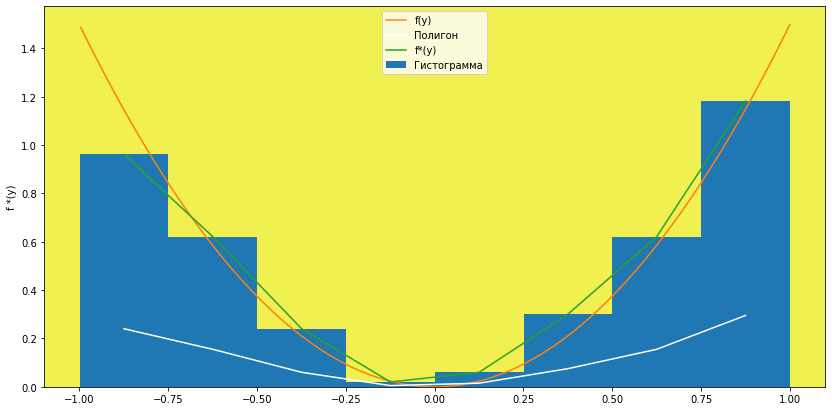

In [11]:
size = 200
M = get_M(size)
sample = get_sample(-1, 1, size)
sample.sort()

# ---------------------------------------------------
# Гистограмма равноинтервальным методом
# ---------------------------------------------------
fig, ax = plt.subplots()
data = pd.DataFrame(sample, columns=["Гистограмма"])
data.plot.hist(density=True, ax=ax, legend=True, bins=int(M))

# ---------------------------------------------------
# Теоритическая плотность f(y)
# ---------------------------------------------------
eps = 1e-3
plt_x = np.arange(Y[0], Y[-1] + eps, eps)
plt_y = [f(y) for y in plt_x]
ax.plot(plt_x, plt_y, label="f(y)")

# ---------------------------------------------------
# Полигон
# ---------------------------------------------------
h = (sample[size-1] - sample[0]) / M    # ширина столбца     
plt_x = np.arange(sample[0] + h/2, sample[-1], h)   # середины интервалов
sample = np.array(sample)
a, b = np.arange(sample[0], sample[-1] + h, h), np.arange(sample[0] + h, sample[-1] + h, h)# границы интервалов

plt_y = [(sample[sample<=b[i]].size - sample[sample<a[i]].size)/size for i in range(M)] # частости
ax.plot(plt_x, plt_y, label="Полигон", color='#ffffff')

# ---------------------------------------------------
# Эмпирическая плотность f*(y)
# ---------------------------------------------------
plt_f_y = [y/h for y in plt_y]
ax.plot(plt_x, plt_f_y, label="f*(y)")

# ---------------------------------------------------
# Таблица для равноинтервальной гистограммы
# ---------------------------------------------------
header = ["A[i]", "B[i]", "v[i]", "h[i]", "f*(y)"]
plt_y = np.array(plt_y)
pretty_table(header, zip(np.arange(sample[0], sample[-1], h), np.arange(sample[0] + h, sample[-1] + h, h),
            plt_y * size, np.arange(1, M + 1) * h, plt_f_y))
# ---------------------------------------------------

ax.legend()
ax.set_ylabel('f *(y)')
ax.set_facecolor('#f0f050')
fig.set_figheight(7)
fig.set_figwidth(14)
plt.show()


## 2. Равновероятностный метод

+---------------------+---------------------+------+---------------------+---------------------+
|         A[i]        |         B[i]        | v[i] |         h[i]        |        f*(y)        |
+---------------------+---------------------+------+---------------------+---------------------+
| -0.9994270081713984 | -0.9262507879690758 |  8   | 0.07317622020232262 |  1.7082052018318445 |
| -0.9262507879690758 |  -0.820693028943684 |  8   | 0.10555775902539177 |  1.184185806463847  |
|  -0.820693028943684 | -0.5788467505971598 |  8   | 0.24184627834652417 |  0.5168572402875535 |
| -0.5788467505971598 | 0.47997378760471043 |  8   |  1.0588205382018703 | 0.11805588906716884 |
| 0.47997378760471043 |  0.6988108568346556 |  8   | 0.21883706922994517 |  0.5712012157714241 |
|  0.6988108568346556 |  0.8224066996513821 |  8   | 0.12359584281672653 |  1.011360877123963  |
|  0.8224066996513821 |  0.9110529227096046 |  8   | 0.08864622305822245 |  1.4100995585328047 |
|  0.9110529227096046 |  0.999

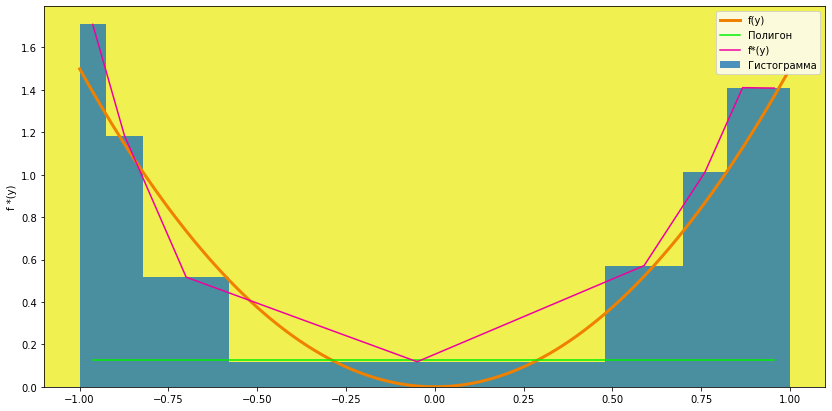

In [12]:
size = 200
M = get_M(size)
sample = get_sample(-1, 1, size)
sample.sort()
#print(sample)

# ---------------------------------------------------
# Гистограмма равновероятностным методом
# ---------------------------------------------------
fig, plot = plt.subplots()
interval_bounds, plt_x, width, height = list(), list(), list(), list()
interval_bounds.append(sample[0])
index = int(size / M)
for i in range(1, M):
    bound = (sample[index] + sample[index-1]) / 2
    x = (interval_bounds[i-1] + bound) / 2
    w = bound - interval_bounds[i-1]
    height.append(1/(M*w))
    interval_bounds.append(bound)
    plt_x.append(x)
    width.append(w)
    index += int(size / M)
interval_bounds.append(sample[index - 1])
plt_x.append((sample[index - 1] + interval_bounds[M-1]) / 2)
w = sample[index - 1] - interval_bounds[M-1]
width.append(w)
height.append(1/(M*w))

# ---------------------------------------------------
# Теоритическая плотность f(y)
# ---------------------------------------------------
plt_x2 = np.arange(sample[0], sample[-1], 0.01)
plt_y2 = 1.5 * plt_x2**2
plot.plot(plt_x2, plt_y2, label="f(y)", color='#f08000', linewidth=3)

# ---------------------------------------------------
poligon_y = [1/M for _ in plt_x]
plot.plot(plt_x, poligon_y, label="Полигон", color='#00f000')

plot.bar(plt_x, height=height, width=width, label="Гистограмма", alpha=0.80)
plot.plot(plt_x, height, label="f*(y)", color='#f000a0')

# ---------------------------------------------------
# Таблица для равновероятностной гистограммы
# ---------------------------------------------------
header = ["A[i]", "B[i]", "v[i]", "h[i]", "f*(y)"]

pretty_table(header, zip(interval_bounds[:-1], interval_bounds[1:], [M] * M, width, height))
# ---------------------------------------------------

plot.legend()
plot.set_ylabel('f *(y)')
plot.set_facecolor('#f0f050')
fig.set_figheight(7)
fig.set_figwidth(14)
plt.show()

# -------------------------------------------------------------------------

# Лабораторная 3

# -------------------------------------------------------------------------

In [13]:
def get_F(sample):
    # ---------------------------------------------------
    # График F*(y)
    # ---------------------------------------------------
    plot = fig.add_subplot(222, aspect='auto', title='Критерий Колмогорова')
    plt_x, plt_y = list(), list()
    plt_x.append(-1.5)
    plt_y.append(0)
    plt_y.append(0)
    height = list()
    height.append(0)
    height.append(0)
    i = 0
    for y in sample:
        plt_x.append(y)
        plt_x.append(y)
        i += 1
        h = i / len(sample)
        height.append(h)
        plt_y.append(h)
        plt_y.append(h)
    plt_x.append(1.5)
    height.append(1)
    height.append(1)

    plt.plot(plt_x, plt_y, label="Эмпирическая")

    # ---------------------------------------------------
    # График F(y)
    # ---------------------------------------------------
    plt_x2, plt_y2 = list(), list()
    plt_x2.append(-1.5)
    plt_y2.append(0)
    plt_x2.append(sample[0])
    plt_y2.append(0)
    for x in sample:
        plt_x2.append(x)
        plt_y2.append(0.5 * (1 + x ** 3))
    plt_x2.append(sample[len(sample) - 1])
    plt_y2.append(1)
    plt_x2.append(1.5)
    plt_y2.append(1)

    plt.plot(plt_x2, plt_y2, label="Теоритическая", alpha=0.9)
    plt.legend()
    plot.set_ylabel('F (y)')
    plot.set_facecolor('#f0f090')

    return np.array(height), np.array(plt_y2)


# ---------------------------------------------------
# Гистограмма, f(y), f*(y)
# ---------------------------------------------------
def bar_chart(Y):
    M = get_M(n)
    A, B = np.zeros(M), np.zeros(M)
    m = n // M

    A[0] = Y[0]
    B[-1] = Y[-1]
    for i in range(1, M):
        A[i] = (Y[i * m - 1] + Y[i * m]) / 2
        B[i - 1] = A[i]

    h = [B[i] - A[i] for i in range(M)]
    Y = np.array(Y)
    freq = [Y[Y <= B[i]].size - Y[Y < A[i]].size for i in np.arange(A.size)]
    f_empirical = [freq[i] / (n * h[i]) for i in range(M)]

    plot = fig.add_subplot(221, aspect='auto', title='Критерий Пирсона')

    plt_x = [(B[i] + A[i]) / 2 for i in range(len(A))]
    plt.bar(plt_x, height=f_empirical, width=h, label="Гистограмма", alpha=0.80)
    
    plt.plot(plt_x, f_empirical, label="f*(y)", color='#f000a0')

    eps = 1e-3
    plt_x = np.arange(Y[0], Y[-1] + eps, eps)
    f_theoretical = [f(y) for y in plt_x]
    plt.plot(plt_x, f_theoretical, label="f(y)", color='#5500a0')

    plt.legend()
    plot.set_ylabel('f *(y)')
    plot.set_facecolor('#f0f050')

    return A, B, m

In [14]:
def check_pierce_criterion(Y):
    A, B, m = bar_chart(Y)
    global confidence_level
    p = [F(B[i]) - F(A[i]) for i in range(len(A))]
    while abs(1 - np.sum(p)) >= confidence_level:
        confidence_level *= 5
    hi_square = sum(((m - n * p[i]) ** 2) / (n * p[i]) for i in range(len(p)))
    print('Pierson Criterion')
    if hi_square < chi2.isf(confidence_level, len(A)-1):
        print(True, ': ', hi_square, ' < ', chi2.isf(confidence_level, len(A) - 1), sep='')
    else:
        print(False, ': ', hi_square, ' > ', chi2.isf(confidence_level, len(A) - 1), sep='')

In [15]:
def check_kolmogorov_criterion(Y):
    F_empirical, F_theoretical = get_F(Y)

    differences_high = abs(F_empirical - F_theoretical)
    
    F_empirical = F_empirical[1:]
    F_theoretical = F_theoretical[:-1]

    differences_low = abs(F_empirical - F_theoretical)

    diff_high = max(differences_high)
    diff_low = max(differences_low)

    lmb = math.sqrt(n) * max(diff_high, diff_low)
    print('\nKolmogorov Criterion')
    if lmb < kolmogorov_prob_value:
        print(True, ': ', lmb, ' < ', kolmogorov_prob_value, sep='')
    else:
        print(False, ': ', lmb, ' > ', kolmogorov_prob_value, sep='')

In [16]:
def check_mizes_criterion(Y):
    Y = np.array(Y)
    D = (F(Y) - (np.arange(n) + 1 - 0.5) / n) ** 2
    nw = 1 / (12 * n) + np.sum(D)

    plot = fig.add_subplot(223, aspect='auto', title='Критерий Р. Мизеса')
    plt.plot(Y, F(Y), Y, (np.arange(n) + 1 - 0.5)/n, label="Мизес")
    plot.set_ylabel('F(y)')
    plot.set_facecolor('#f0f070')

    print('\nMizes Criterion')
    if nw < mizes_prob_value:
        print(True, ': ', nw, ' < ', mizes_prob_value, sep='')
    else:
        print(False, ': ', nw, ' > ', mizes_prob_value, sep='')

Pierson Criterion
True: 7.759948944904643 < 16.811893829770927

Kolmogorov Criterion
True: 0.9560157394007003 < 1.63

Mizes Criterion
True: 0.13008511486592608 < 0.744


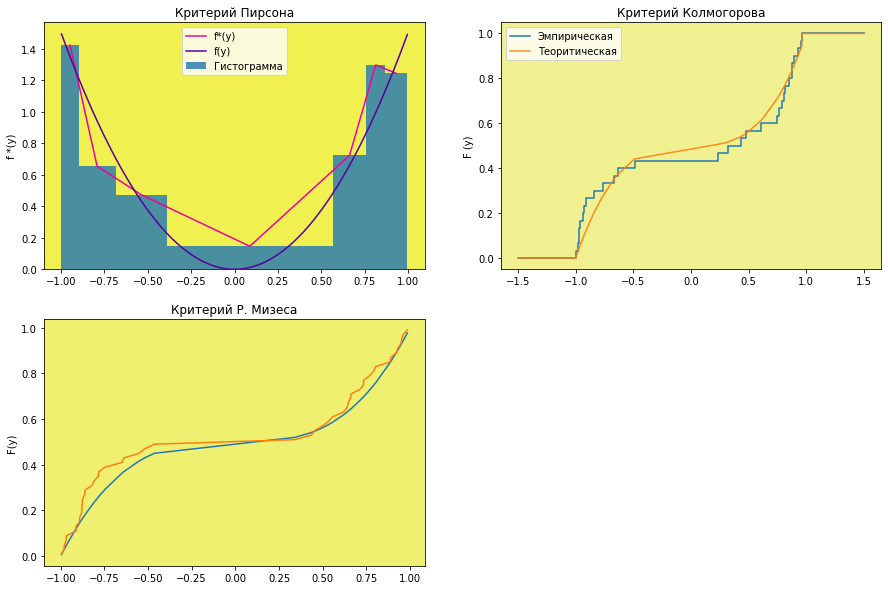

In [18]:
fig = plt.figure(figsize=(15, 10))

confidence_level = 0.01
kolmogorov_prob_value = 1.63
mizes_prob_value = 0.744

a = -1
b = 1

n = 200
Y = get_sample(a, b, n)
check_pierce_criterion(Y)

n = 30
Y = get_sample(a, b, n)
check_kolmogorov_criterion(Y)

n = 50
Y = get_sample(a, b, n)
check_mizes_criterion(Y)

plt.show()

# -------------------------------------------------------------------------

# Лабораторная 4

# -------------------------------------------------------------------------

In [48]:
from scipy.stats import t as T
from matplotlib import rcParams


rcParams['axes.titlepad'] = 20
rcParams['axes.titlesize'] = 15

In [49]:
a = -1
b = 1
n = [20, 30, 50, 70, 100, 150]

gamma = np.array([0.9, 0.95, 0.98, 0.99])
t = lambda n: T.isf((1 - gamma)/2, n - 1)
u = np.array([1.96, 2.24, 2.57, 2.81])

In [50]:
m, d = list(), list()
for n_i in n:
    Y = get_sample(a, b, n_i)
    Y.sort()
    Y = np.array(Y)
    m_value = np.mean(Y)
    d_value = sum((Y - m_value) ** 2) / (n_i - 1)
    m.append(m_value)
    d.append(d_value)

In [52]:
print('\nТОЧЕЧНЫЕ ОЦЕНКИ ПАРАМЕТРОВ РАСПРЕДЕЛЕНИЯ\n')
pretty_table(['n', 'МО', 'Дисперсия'], zip(n, m, d))


ТОЧЕЧНЫЕ ОЦЕНКИ ПАРАМЕТРОВ РАСПРЕДЕЛЕНИЯ

+-----+-----------------------+---------------------+
|  n  |           МО          |      Дисперсия      |
+-----+-----------------------+---------------------+
|  20 |  -0.0814669801223898  | 0.48920150709183063 |
|  30 |  0.02067118273586549  |  0.6318626857953569 |
|  50 |  -0.16151389860956744 |  0.5153208424719692 |
|  70 |  -0.17685606928917066 |  0.5419758138382502 |
| 100 |  -0.04054533786302262 |  0.5824641805532658 |
| 150 | -0.026818992202301595 |  0.5955880459207195 |
+-----+-----------------------+---------------------+


In [ ]:
I_length, I_length_accurate = list(), list()

d_accurate = 0.6
conf_level = 0.99
num = 100
for i in range(19999):
    sample = get_sample(a, b, num)
    sample.sort()
    sample = np.array(sample)
    m_value = np.mean(sample)
    d_value = sum((sample - m_value) ** 2) / (num - 1)
    
    I_start = m_value - t(num)[-1] * (d_value / num) ** 0.5
    I_end = m_value + t(num)[-1] * (d_value / num) ** 0.5
    I_delta = I_end - I_start
    I_length.append(I_delta)
    
    I_start = m_value - u[-1] * (d_accurate / num) ** 0.5
    I_end = m_value + u[-1] * (d_accurate / num) ** 0.5
    I_delta = I_end - I_start
    I_length_accurate.append(I_delta)
    
I_length = np.array(I_length)
I_length_accurate = np.array(I_length_accurate)

print("Среднее значение интервала при неизвестной дисперсии: {}".format(I_length.mean()))
print("Среднее значение интервала при известной дисперсии: {}".format(I_length_accurate.mean()))

In [ ]:
I_length, I_length_accurate = list(), list()

d_accurate = 0.6
conf_level = 0.99
num = 100
for i in range(10000):
    sample = get_sample(a, b, num)
    sample.sort()
    sample = np.array(sample)
    m_value = np.mean(sample)
    d_value = sum((sample - m_value) ** 2) / (num - 1)
    
    h_start = chi2.isf((1 - gamma[-1]) / 2, num - 1)
    h_end = chi2.isf(1 - (1 - gamma[-1]) / 2, num - 1)

    I_start = d_value * (num - 1) / h_start
    I_end = d_value * (num - 1) / h_end
    I_delta = I_end - I_start
    I_length.append(I_delta)
    
    h_start = chi2.isf((1 - gamma[-1]) / 2, num)
    h_end = chi2.isf(1 - (1 - gamma[-1]) / 2, num)

    I_start = d_accurate * num / h_start
    I_end = d_accurate * num / h_end
    I_delta = I_end - I_start
    I_length_accurate.append(I_delta)
    
I_length = np.array(I_length)
I_length_accurate = np.array(I_length_accurate)

print("Среднее значение интервала при неизвестной дисперсии: {}".format(I_length.mean()))
print("Среднее значение интервала при известной дисперсии: {}".format(I_length_accurate.mean()))

In [97]:
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()

print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ МО\n')
I_length = list()

#---------------------------------------------------------
for i in range(len(n)):
    I_start = m[i] - t(n[i]) * (d[i] / n[i]) ** 0.5
    I_end = m[i] + t(n[i]) * (d[i] / n[i]) ** 0.5
    I_delta = I_end - I_start
    I_length.append(I_delta[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'],
                 zip(gamma, I_start, I_end, I_delta))
    plot.plot(gamma, I_delta, label='n = {}'.format(n[i]))
    
#---------------------------------------------------------
plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ УРОВНЯ ЗНАЧИМОСТИ')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.plot(n, I_length)
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)
plt.show()

0.41069925558957565
Среднее значение интервала при неизвестной дисперсии: 0.4067758878077375
Среднее значение интервала при известной дисперсии: 0.4353233281137136


In [92]:
I_length, I_length_accurate = list(), list()

d_accurate = 0.6
conf_level = 0.99
num = 100
for i in range(10000):
    sample = get_sample(a, b, num)
    sample.sort()
    sample = np.array(sample)
    m_value = np.mean(sample)
    d_value = sum((sample - m_value) ** 2) / (num - 1)
    
    h_start = chi2.isf((1 - gamma[-1]) / 2, num - 1)
    h_end = chi2.isf(1 - (1 - gamma[-1]) / 2, num - 1)

    I_start = d_value * (num - 1) / h_start
    I_end = d_value * (num - 1) / h_end
    I_delta = I_end - I_start
    I_length.append(I_delta)
    
    h_start = chi2.isf((1 - gamma[-1]) / 2, num)
    h_end = chi2.isf(1 - (1 - gamma[-1]) / 2, num)

    I_start = d_accurate * num / h_start
    I_end = d_accurate * num / h_end
    I_delta = I_end - I_start
    I_length_accurate.append(I_delta)
    
I_length = np.array(I_length)
I_length_accurate = np.array(I_length_accurate)

print("Среднее значение интервала при неизвестной дисперсии: {}".format(I_length.mean()))
print("Среднее значение интервала при известной дисперсии: {}".format(I_length_accurate.mean()))

Среднее значение интервала при неизвестной дисперсии: 0.46552780028063245
Среднее значение интервала при известной дисперсии: 0.46311226526990357



ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ МО


n = 20

+--------------------+---------------------+---------------------+--------------------+
| Уровень значимости |   Начало интервала  |   Конец интервала   | Величина интервала |
+--------------------+---------------------+---------------------+--------------------+
|        0.9         | -0.3518984615526663 | 0.18896450130788672 | 0.540862962860553  |
|        0.95        | -0.4088100227917502 | 0.24587606254697064 | 0.6546860853387209 |
|        0.98        |  -0.478634969030675 |  0.3157010087858954 | 0.7943359778165704 |
|        0.99        | -0.5289090613449834 | 0.36597510110020376 | 0.8948841624451871 |
+--------------------+---------------------+---------------------+--------------------+

n = 30

+--------------------+----------------------+---------------------+--------------------+
| Уровень значимости |   Начало интервала   |   Конец интервала   | Величина интервала |
+--------------------+----------------------+---------------

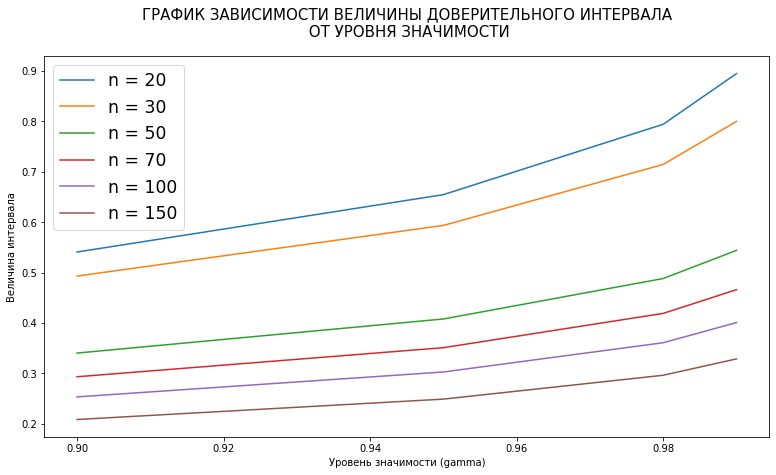

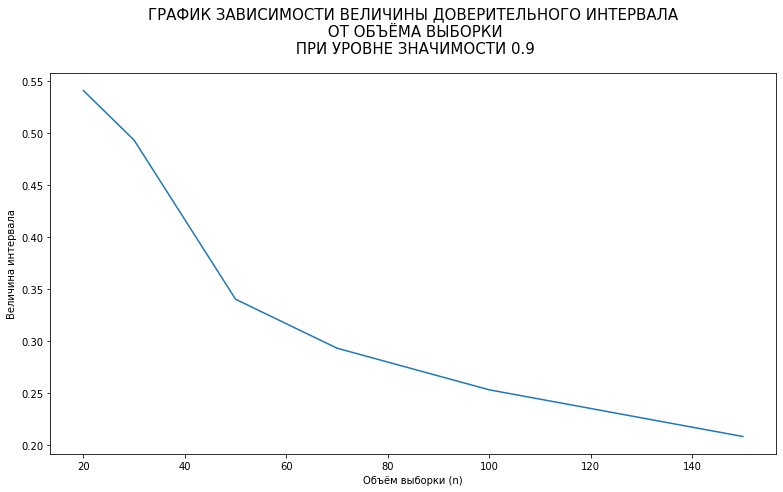

In [53]:
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()

print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ МО\n')
I_length = list()

#---------------------------------------------------------
for i in range(len(n)):
    I_start = m[i] - t(n[i]) * (d[i] / n[i]) ** 0.5
    I_end = m[i] + t(n[i]) * (d[i] / n[i]) ** 0.5
    I_delta = I_end - I_start
    I_length.append(I_delta[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'],
                 zip(gamma, I_start, I_end, I_delta))
    plot.plot(gamma, I_delta, label='n = {}'.format(n[i]))
    
#---------------------------------------------------------
plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ УРОВНЯ ЗНАЧИМОСТИ')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.plot(n, I_length)
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)
plt.show()

### МАТ. ОЖИДАНИЕ     $Y= X^{1/3}$

<tex>$$M[y] = \int_{-1}^{1} {y*f(y)}dy = \int_{-1}^{1} {y*1.5*y^2}dy = 0$$</tex>

### ДИСПЕРСИЯ    $Y= X^{1/3}$
<tex>$$D[y] = \int_{-1}^{1} {(y-m_x)^2 * f(y)} dy = \int_{-1}^{1} {y^2 * 1.5 * y^2}dy = 0.6$$</tex>

In [54]:
print('\nТЕОРИТИЧЕСКИЕ ЗНАЧЕНИЯ ПАРАМЕТРОВ РАСПРЕДЕЛЕНИЯ\n')
d_accurate = 0.6
m_accurate = 0
pretty_table(['МО', 'Дисперсия'], zip([m_accurate], [d_accurate]))


ТЕОРИТИЧЕСКИЕ ЗНАЧЕНИЯ ПАРАМЕТРОВ РАСПРЕДЕЛЕНИЯ

+----+-----------+
| МО | Дисперсия |
+----+-----------+
| 0  |    0.6    |
+----+-----------+



ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ МО (точная дисперсия)


n = 20

+--------------------+----------------------+---------------------+--------------------+
| Уровень значимости |   Начало интервала   |   Конец интервала   | Величина интервала |
+--------------------+----------------------+---------------------+--------------------+
|        0.9         | -0.4209489384058897  | 0.25801497816111013 | 0.6789639165669998 |
|        0.95        | -0.46944636101781834 | 0.30651240077303876 | 0.7759587617908571 |
|        0.98        | -0.5266040376675912  | 0.36367007742281166 | 0.8902741150904029 |
|        0.99        | -0.5681732570492444  | 0.40523929680446474 | 0.9734125538537091 |
+--------------------+----------------------+---------------------+--------------------+

n = 30

+--------------------+----------------------+---------------------+--------------------+
| Уровень значимости |   Начало интервала   |   Конец интервала   | Величина интервала |
+--------------------+-----------

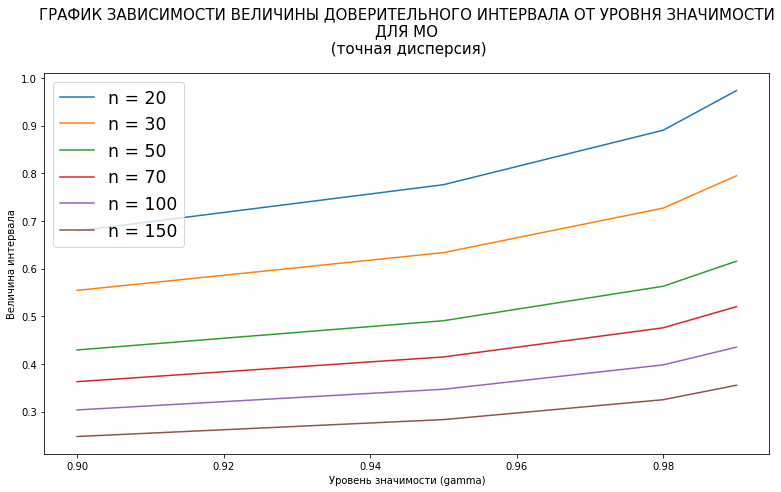

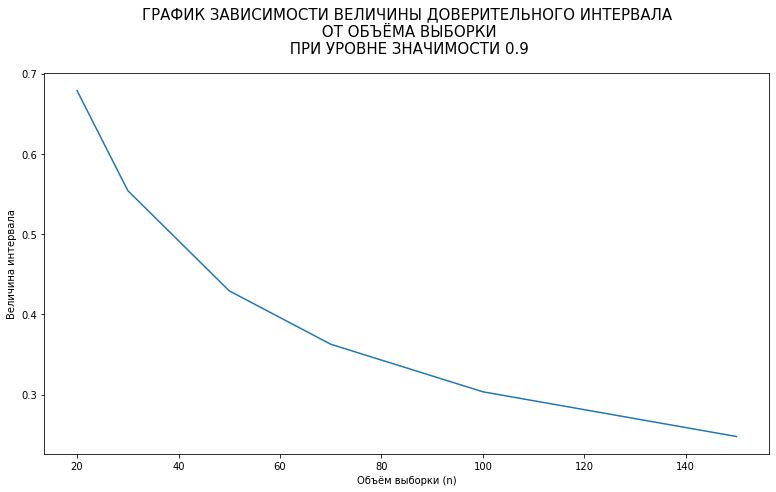

In [55]:
print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ МО (точная дисперсия)\n')
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()
I_length_accurate = list()

for i in range(len(n)):
    I_start_accurate = m[i] - u * (d_accurate / n[i]) ** 0.5
    I_end_accurate = m[i] + u * (d_accurate / n[i]) ** 0.5
    I_delta_accurate = I_end_accurate - I_start_accurate
    I_length_accurate.append(I_delta_accurate[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'], 
                 zip(gamma, I_start_accurate, I_end_accurate, I_delta_accurate))
    plot.plot(gamma, I_delta_accurate, label='n = {}'.format(n[i]))

plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА ОТ УРОВНЯ ЗНАЧИМОСТИ\nДЛЯ МО\n (точная дисперсия)')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.plot(n, I_length_accurate)
plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)
plt.show()


ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ


n = 20

+--------------------+---------------------+--------------------+--------------------+
| Уровень значимости |   Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+---------------------+--------------------+--------------------+
|        0.9         |  0.3083523892653071 | 0.9187324930861902 | 0.6103801038208831 |
|        0.95        | 0.28292755864341856 | 1.0435986565052802 | 0.7606710978618616 |
|        0.98        | 0.25682800270821393 | 1.2177594470023114 | 0.9609314442940975 |
|        0.99        | 0.24090940926460863 | 1.3581045316720892 | 1.1171951224074805 |
+--------------------+---------------------+--------------------+--------------------+

n = 30

+--------------------+--------------------+--------------------+--------------------+
| Уровень значимости |  Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+--------------------+--------------------+---

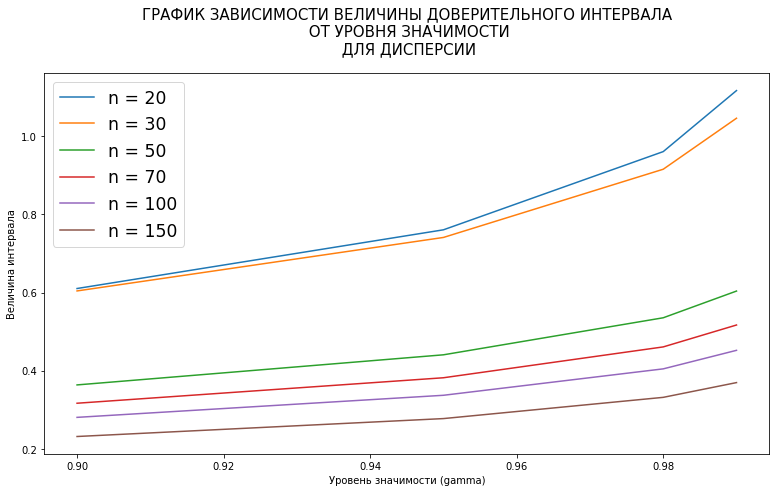

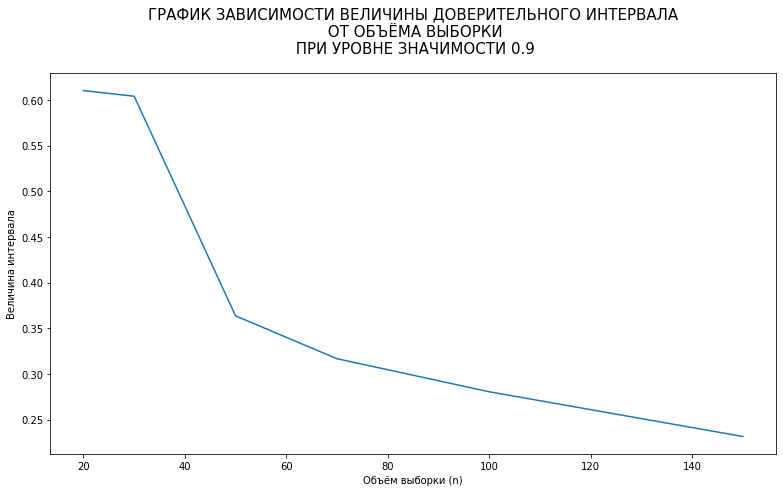

In [56]:
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()
I_length = list()
print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ\n')

for i in range(len(n)):
    h_start = chi2.isf((1 - gamma) / 2, n[i] - 1)
    h_end = chi2.isf(1 - (1 - gamma) / 2, n[i] - 1)

    I_start = d[i] * (n[i] - 1) / h_start
    I_end = d[i] * (n[i] - 1) / h_end
    I_delta = I_end - I_start
    I_length.append(I_delta[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'],
             zip(gamma, I_start, I_end, I_delta))
    plot.plot(gamma, I_delta, label='n = {}'.format(n[i]))

plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ УРОВНЯ ЗНАЧИМОСТИ\n ДЛЯ ДИСПЕРСИИ')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.plot(n, I_length)
plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)

plt.show()


ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ (точное МО)


n = 20

+--------------------+---------------------+--------------------+--------------------+
| Уровень значимости |   Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+---------------------+--------------------+--------------------+
|        0.9         |  0.3820386703841304 | 1.1059080804255363 | 0.7238694100414059 |
|        0.95        |  0.351189290357426  | 1.251202015144071  | 0.900012724786645  |
|        0.98        | 0.31943579302423014 | 1.4527144475248097 | 1.1332786545005795 |
|        0.99        |  0.3000236545179338 | 1.6142388212022414 | 1.3142151666843076 |
+--------------------+---------------------+--------------------+--------------------+

n = 30

+--------------------+--------------------+--------------------+--------------------+
| Уровень значимости |  Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+--------------------+------------

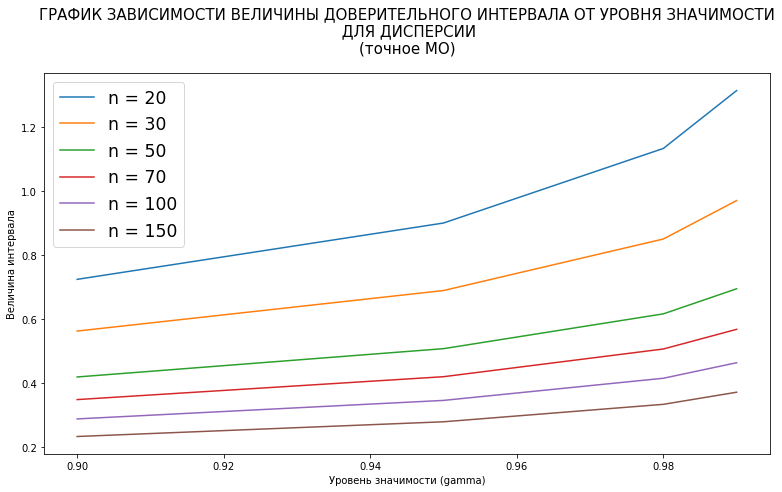

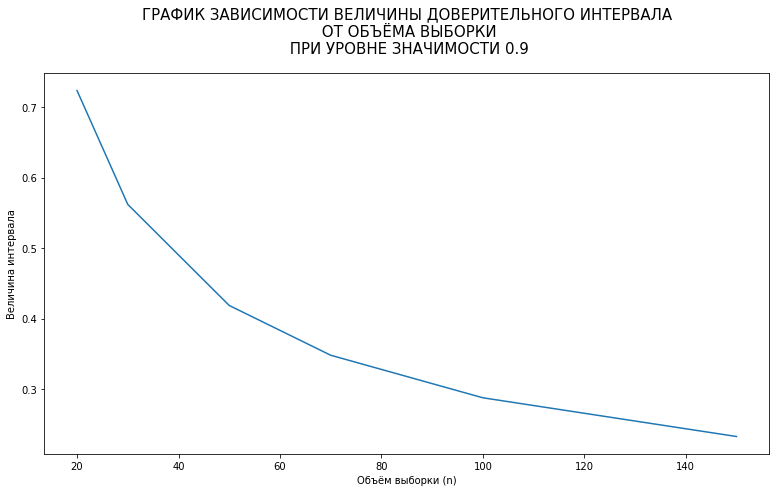

In [57]:
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()
I_length_accurate = list()
print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ (точное МО)\n')

for i in range(len(n)):
    h_start = chi2.isf((1 - gamma) / 2, n[i])
    h_end = chi2.isf(1 - (1 - gamma) / 2, n[i])

    I_start = d_accurate * n[i] / h_start
    I_end = d_accurate * n[i] / h_end
    I_delta = I_end - I_start
    I_length_accurate.append(I_delta[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'],
             zip(gamma, I_start, I_end, I_delta))
    plot.plot(gamma, I_delta, label='n = {}'.format(n[i]))

plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА ОТ УРОВНЯ ЗНАЧИМОСТИ\n ДЛЯ ДИСПЕРСИИ\n(точное МО)')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.plot(n, I_length_accurate)
plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)

plt.show()


ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ (точное МО)


n = 20

+--------------------+---------------------+--------------------+--------------------+
| Уровень значимости |   Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+---------------------+--------------------+--------------------+
|        0.9         |  0.3820386703841304 | 1.1059080804255363 | 0.7238694100414059 |
|        0.95        |  0.351189290357426  | 1.251202015144071  | 0.900012724786645  |
|        0.98        | 0.31943579302423014 | 1.4527144475248097 | 1.1332786545005795 |
|        0.99        |  0.3000236545179338 | 1.6142388212022414 | 1.3142151666843076 |
+--------------------+---------------------+--------------------+--------------------+

n = 30

+--------------------+--------------------+--------------------+--------------------+
| Уровень значимости |  Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+--------------------+------------

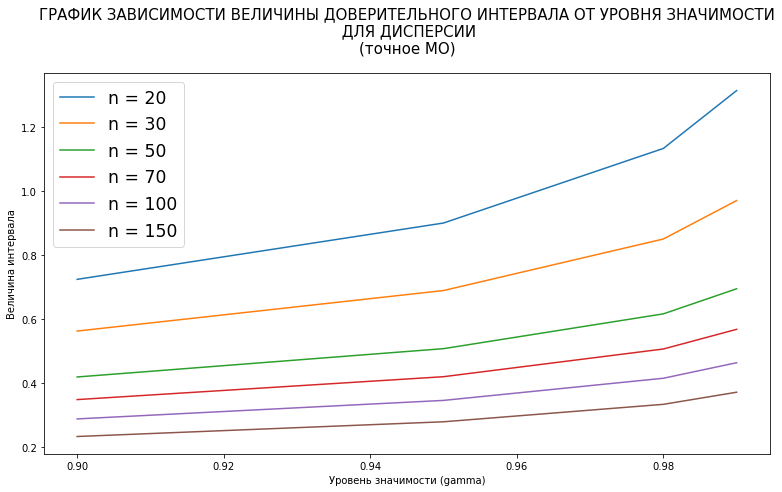

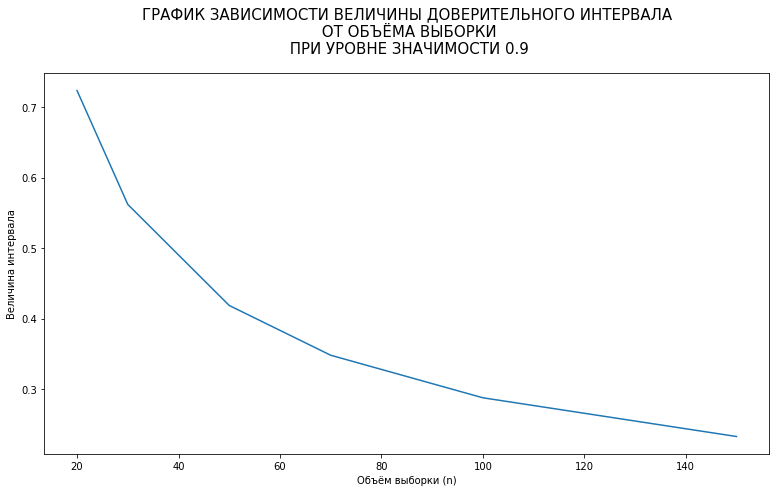

In [58]:
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()
I_length_accurate = list()
print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ (точное МО)\n')

for i in range(len(n)):
    h_start = chi2.isf((1 - gamma) / 2, n[i])
    h_end = chi2.isf(1 - (1 - gamma) / 2, n[i])

    I_start = d_accurate * n[i] / h_start
    I_end = d_accurate * n[i] / h_end
    I_delta = I_end - I_start
    I_length_accurate.append(I_delta[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'],
             zip(gamma, I_start, I_end, I_delta))
    plot.plot(gamma, I_delta, label='n = {}'.format(n[i]))

plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА ОТ УРОВНЯ ЗНАЧИМОСТИ\n ДЛЯ ДИСПЕРСИИ\n(точное МО)')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.plot(n, I_length_accurate)
plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)

plt.show()

In [537]:
print('\nТОЧЕЧНЫЕ ОЦЕНКИ ПАРАМЕТРОВ РАСПРЕДЕЛЕНИЯ\n')
pretty_table(['n', 'МО', 'Дисперсия'], zip(n_range, m, d))


ТОЧЕЧНЫЕ ОЦЕНКИ ПАРАМЕТРОВ РАСПРЕДЕЛЕНИЯ

+-----+------------------------+--------------------+
|  n  |           МО           |     Дисперсия      |
+-----+------------------------+--------------------+
|  20 | 0.0023858015585566496  | 0.6688550788680763 |
|  30 |  0.11151969979464545   | 0.5986764567641853 |
|  50 |  0.19166535217221814   | 0.5939338768036379 |
|  70 | -0.046427401565486824  | 0.618510840580088  |
| 100 |  -0.09422386408814903  | 0.6109621816635874 |
| 150 | -0.0033008522362326666 | 0.6279811117537891 |
+-----+------------------------+--------------------+



ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ МО


n = 20

+--------------------+---------------------+---------------------+--------------------+
| Уровень значимости |   Начало интервала  |   Конец интервала   | Величина интервала |
+--------------------+---------------------+---------------------+--------------------+
|        0.9         | -0.3138269422949035 |  0.3185985454120168 | 0.6324254877069203 |
|        0.95        | -0.3803730442546887 | 0.38514464737180204 | 0.7655176916264907 |
|        0.98        | -0.4620186341943473 | 0.46679023731146063 | 0.9288088715058079 |
|        0.99        |  -0.520803612153906 |  0.5255752152710192 | 1.0463788274249253 |
+--------------------+---------------------+---------------------+--------------------+

n = 30

+--------------------+----------------------+---------------------+---------------------+
| Уровень значимости |   Начало интервала   |   Конец интервала   |  Величина интервала |
+--------------------+----------------------+-------------

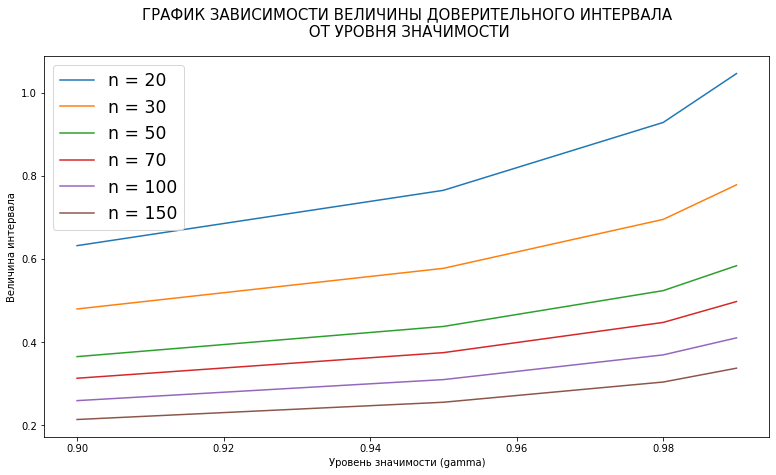

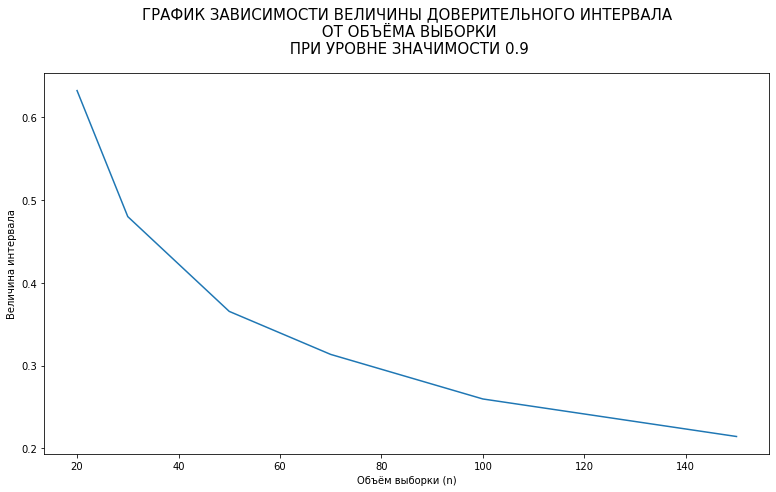

In [538]:
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()

print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ МО\n')
I_length = list()

#---------------------------------------------------------
for i in range(len(n)):
    I_start = m[i] - t(n[i]) * (d[i] / n[i]) ** 0.5
    I_end = m[i] + t(n[i]) * (d[i] / n[i]) ** 0.5
    I_delta = I_end - I_start
    I_length.append(I_delta[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'],
                 zip(gamma, I_start, I_end, I_delta))
    plot.plot(gamma, I_delta, label='n = {}'.format(n[i]))
    
#---------------------------------------------------------
plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ УРОВНЯ ЗНАЧИМОСТИ')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.plot(n, I_length)
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)
plt.show()

### МАТ. ОЖИДАНИЕ     $Y= X^{1/3}$

<tex>$$M[y] = \int_{-1}^{1} {y*f(y)}dy = \int_{-1}^{1} {y*1.5*y^2}dy = 0$$</tex>

### ДИСПЕРСИЯ    $Y= X^{1/3}$
<tex>$$D[y] = \int_{-1}^{1} {(y-m_x)^2 * f(y)} dy = \int_{-1}^{1} {y^2 * 1.5 * y^2}dy = 0.6$$</tex>

In [539]:
print('\nТЕОРИТИЧЕСКИЕ ЗНАЧЕНИЯ ПАРАМЕТРОВ РАСПРЕДЕЛЕНИЯ\n')
d_accurate = 0.6
m_accurate = 0
pretty_table(['МО', 'Дисперсия'], zip([m_accurate], [d_accurate]))


ТЕОРИТИЧЕСКИЕ ЗНАЧЕНИЯ ПАРАМЕТРОВ РАСПРЕДЕЛЕНИЯ

+----+-----------+
| МО | Дисперсия |
+----+-----------+
| 0  |    0.6    |
+----+-----------+



ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ МО (точная дисперсия)


n = 20

+--------------------+----------------------+--------------------+--------------------+
| Уровень значимости |   Начало интервала   |  Конец интервала   | Величина интервала |
+--------------------+----------------------+--------------------+--------------------+
|        0.9         | -0.33709615672494325 | 0.3418677598420566 | 0.6789639165669998 |
|        0.95        | -0.3855935793368719  | 0.3903651824539852 | 0.7759587617908571 |
|        0.98        | -0.4427512559866448  | 0.4475228591037581 | 0.8902741150904029 |
|        0.99        | -0.48432047536829786 | 0.4890920784854112 | 0.9734125538537091 |
+--------------------+----------------------+--------------------+--------------------+

n = 30

+--------------------+----------------------+---------------------+--------------------+
| Уровень значимости |   Начало интервала   |   Конец интервала   | Величина интервала |
+--------------------+-------------------

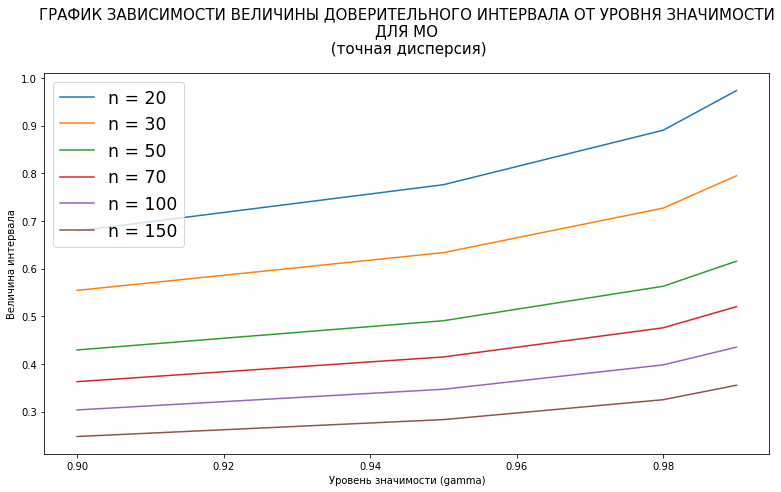

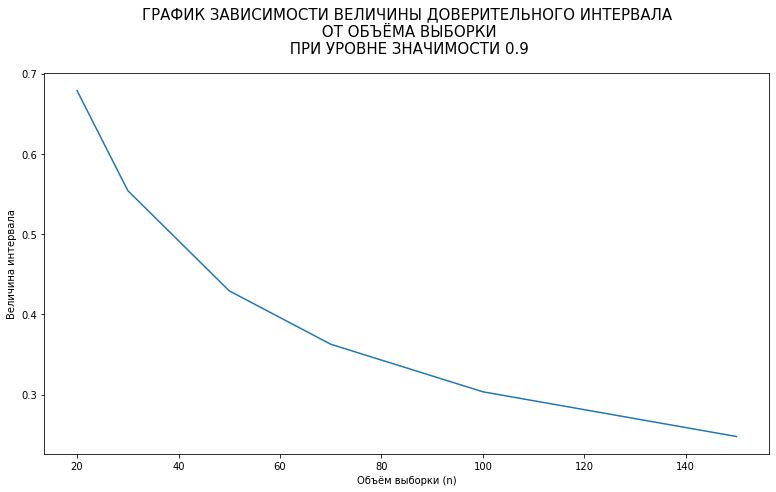

In [540]:
print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ МО (точная дисперсия)\n')
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()
I_length_accurate = list()

for i in range(len(n)):
    I_start_accurate = m[i] - u * (d_accurate / n[i]) ** 0.5
    I_end_accurate = m[i] + u * (d_accurate / n[i]) ** 0.5
    I_delta_accurate = I_end_accurate - I_start_accurate
    I_length_accurate.append(I_delta_accurate[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'], 
                 zip(gamma, I_start_accurate, I_end_accurate, I_delta_accurate))
    plot.plot(gamma, I_delta_accurate, label='n = {}'.format(n[i]))

plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА ОТ УРОВНЯ ЗНАЧИМОСТИ\nДЛЯ МО\n (точная дисперсия)')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.plot(n, I_length_accurate)
plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)
plt.show()


ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ


n = 20

+--------------------+---------------------+--------------------+--------------------+
| Уровень значимости |   Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+---------------------+--------------------+--------------------+
|        0.9         |  0.4215912229446418 | 1.2561263307933292 | 0.8345351078486875 |
|        0.95        |  0.3868294185669244 | 1.4268481425026132 | 1.0400187239356888 |
|        0.98        |  0.3511451038409966 | 1.6649674605646316 | 1.3138223567236351 |
|        0.99        | 0.32938059183757634 | 1.8568526475780276 | 1.5274720557404513 |
+--------------------+---------------------+--------------------+--------------------+

n = 30

+--------------------+---------------------+--------------------+--------------------+
| Уровень значимости |   Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+---------------------+--------------------+

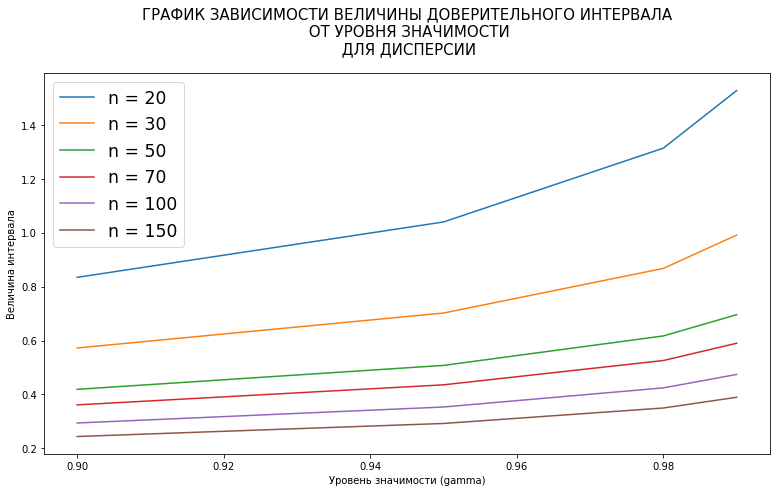

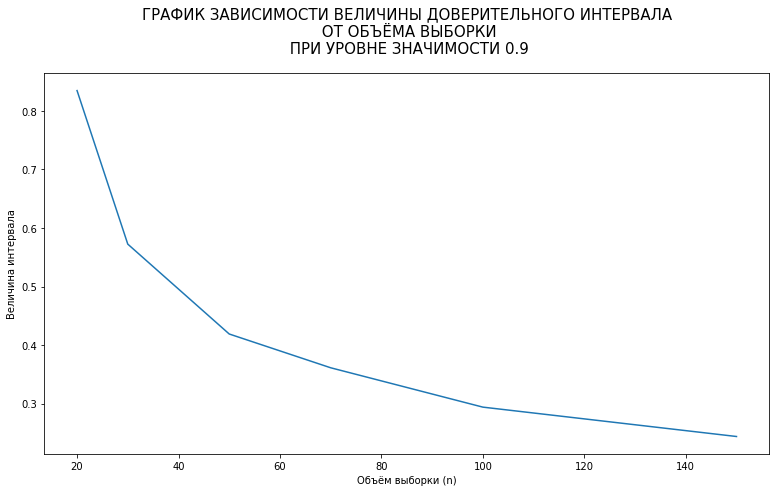

In [541]:
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()
I_length = list()
print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ\n')

for i in range(len(n)):
    h_start = chi2.isf((1 - gamma) / 2, n[i] - 1)
    h_end = chi2.isf(1 - (1 - gamma) / 2, n[i] - 1)

    I_start = d[i] * (n[i] - 1) / h_start
    I_end = d[i] * (n[i] - 1) / h_end
    I_delta = I_end - I_start
    I_length.append(I_delta[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'],
             zip(gamma, I_start, I_end, I_delta))
    plot.plot(gamma, I_delta, label='n = {}'.format(n[i]))

plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ УРОВНЯ ЗНАЧИМОСТИ\n ДЛЯ ДИСПЕРСИИ')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.plot(n, I_length)
plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)

plt.show()


ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ (точное МО)


n = 20

+--------------------+---------------------+--------------------+--------------------+
| Уровень значимости |   Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+---------------------+--------------------+--------------------+
|        0.9         |  0.3820386703841304 | 1.1059080804255363 | 0.7238694100414059 |
|        0.95        |  0.351189290357426  | 1.251202015144071  | 0.900012724786645  |
|        0.98        | 0.31943579302423014 | 1.4527144475248097 | 1.1332786545005795 |
|        0.99        |  0.3000236545179338 | 1.6142388212022414 | 1.3142151666843076 |
+--------------------+---------------------+--------------------+--------------------+

n = 30

+--------------------+--------------------+--------------------+--------------------+
| Уровень значимости |  Начало интервала  |  Конец интервала   | Величина интервала |
+--------------------+--------------------+------------

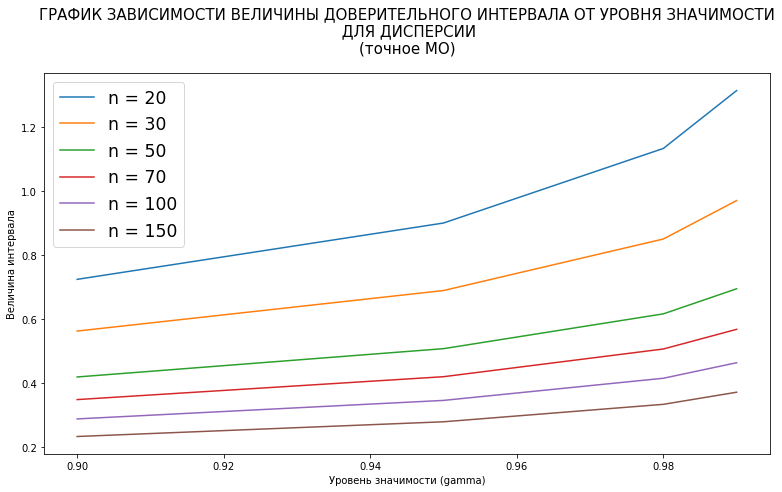

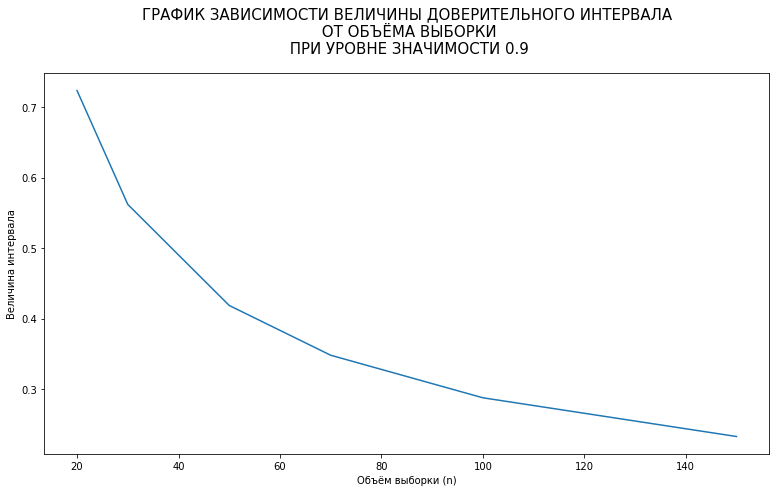

In [542]:
fig, plot = plt.subplots()
fig2, plot2 = plt.subplots()
I_length_accurate = list()
print('\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ОЦЕНКИ ДИСПЕРСИИ (точное МО)\n')

for i in range(len(n)):
    h_start = chi2.isf((1 - gamma) / 2, n[i])
    h_end = chi2.isf(1 - (1 - gamma) / 2, n[i])

    I_start = d_accurate * n[i] / h_start
    I_end = d_accurate * n[i] / h_end
    I_delta = I_end - I_start
    I_length_accurate.append(I_delta[0])

    print('\nn = {}\n'. format(n[i]))
    pretty_table(['Уровень значимости', 'Начало интервала', 'Конец интервала', 'Величина интервала'],
             zip(gamma, I_start, I_end, I_delta))
    plot.plot(gamma, I_delta, label='n = {}'.format(n[i]))

plot.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА ОТ УРОВНЯ ЗНАЧИМОСТИ\n ДЛЯ ДИСПЕРСИИ\n(точное МО)')
plot.legend(fontsize='xx-large')  
plot.set_ylabel('Величина интервала')
plot.set_xlabel('Уровень значимости (gamma)')
fig.set_figheight(7)
fig.set_figwidth(13)

plot2.plot(n, I_length_accurate)
plot2.set_title('ГРАФИК ЗАВИСИМОСТИ ВЕЛИЧИНЫ ДОВЕРИТЕЛЬНОГО ИНТЕРВАЛА\n ОТ ОБЪЁМА ВЫБОРКИ\n ПРИ УРОВНЕ ЗНАЧИМОСТИ 0.9')
plot2.set_ylabel('Величина интервала')
plot2.set_xlabel('Объём выборки (n)')
fig2.set_figheight(7)
fig2.set_figwidth(13)

plt.show()